Tiempo total acumulado: 0.0410311222076416 segundos


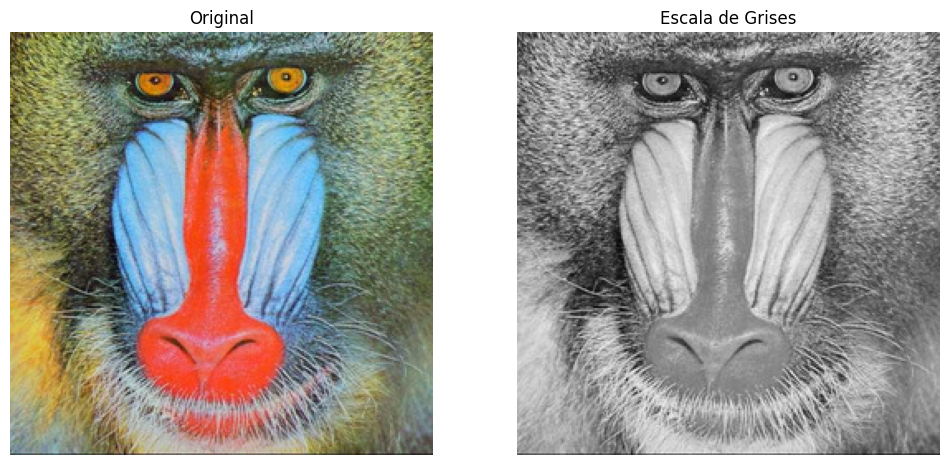

In [306]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import imageio
import time
from scipy.stats import multivariate_normal
%matplotlib inline

tiempo_acumulado = 0
start_time = time.time()
# leer la imagen de Baboo original
imagen_original = mpimg.imread("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/baboon.jpg")
# Debemos cumplir con la siguiente formula g(x,y) = f(x,y)h(x,y)+n(x)
# Convertir la imagen de Baboo original a escala de grises. Ésta será nuestra f(x,y)
imagen_gris = cv2.cvtColor(imagen_original, cv2.COLOR_RGB2GRAY)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen_original)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_gris, cmap="gray")
plt.title("Escala de Grises")
plt.axis('off')

end_time = time.time()
tiempo_acumulado += end_time - start_time

print("Tiempo total acumulado:", tiempo_acumulado, "segundos")

plt.show()

Tiempo total acumulado: 0.06779837608337402 segundos


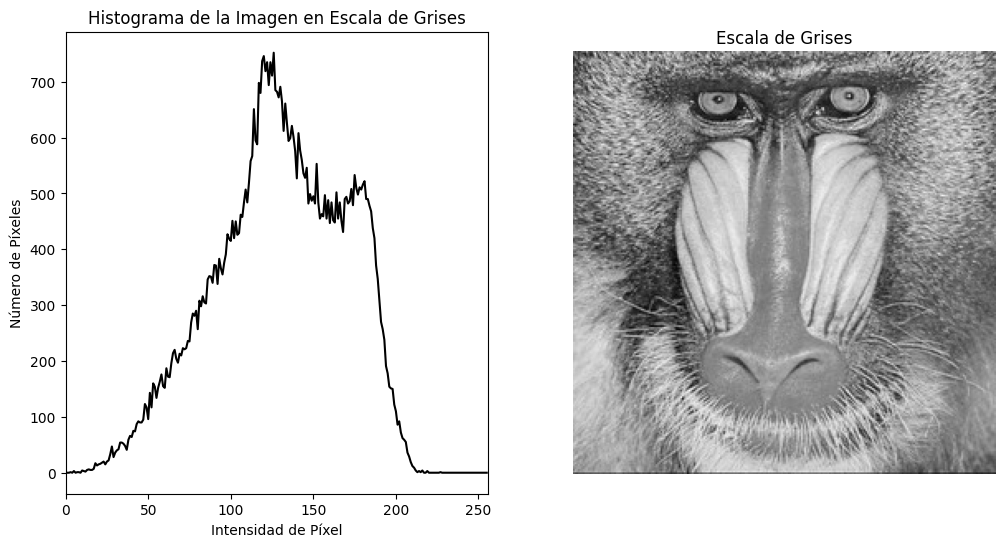

In [307]:
# Calcular el histograma de la imagen en escala de grises
start_time = time.time()

histograma = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma, color='black')
plt.title("Histograma de la Imagen en Escala de Grises")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

# Mostrar la imagen en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(imagen_gris, cmap="gray")
plt.title("Escala de Grises")
plt.axis('off')

end_time = time.time()
tiempo_acumulado += end_time - start_time

print("Tiempo total acumulado:", tiempo_acumulado, "segundos")

plt.show()

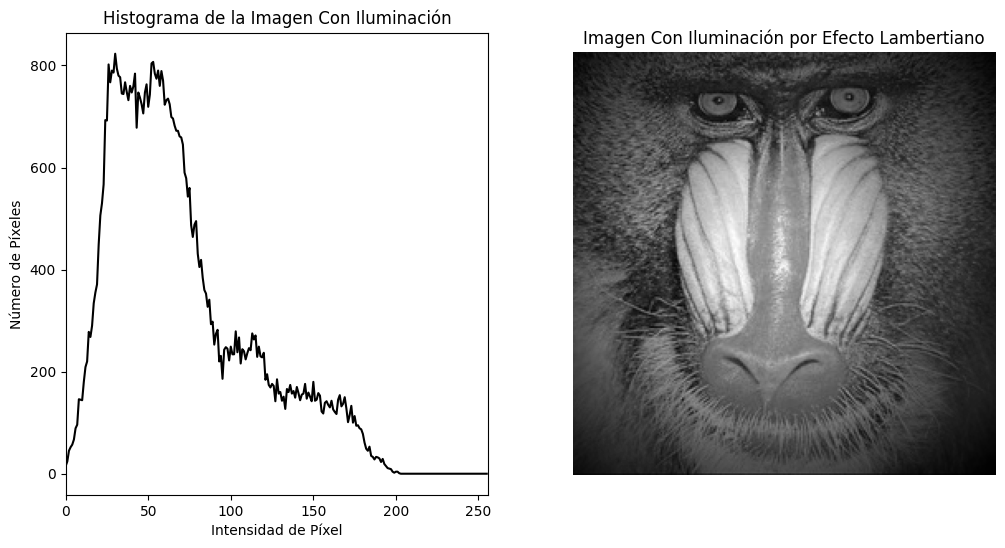

In [308]:
r, c = imagen_gris.shape

# Parámetros para el efecto de iluminación
tau = 5.0
alfa = 245.0
rho = 2.0

# Convertir tau y alfa a radianes
tau = (np.pi * tau) / 180.0
alfa = (np.pi * alfa) / 180.0

# Aplicar el efecto de iluminación
I_effect = np.zeros((r, c))
for i in range(r):
    for j in range(c):
        x0 = (i - r / 2) / (r / 4.0)
        y0 = (j - c / 2) / (c / 4.0)
        R = np.cos(tau) * np.sqrt((rho * np.tan(tau) * np.cos(alfa) - x0) ** 2 + (rho * np.tan(tau) * np.sin(alfa) - y0) ** 2)
        R = np.arctan(rho / R)
        R = np.cos(1.5708 - R)
        I_effect[i, j] = R

# Normalizar el efecto y aplicarlo a la imagen en escala de grises
I_effect_normalized = (I_effect - np.min(I_effect)) / (np.max(I_effect) - np.min(I_effect))
imagen_sombreada = imagen_gris.astype(np.float32) * I_effect_normalized

# Asegurar que la imagen resultante tenga valores válidos de 0 a 255
imagen_sombreada = np.clip(imagen_sombreada, 0, 255).astype(np.uint8)
# Calcular el histograma de la imagen en escala de grises con factor de iluminación
histograma_sombreado = cv2.calcHist([imagen_sombreada], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_sombreado, color='black')
plt.title("Histograma de la Imagen Con Iluminación")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.imshow(imagen_sombreada, cmap="gray")
plt.title("Imagen Con Iluminación por Efecto Lambertiano")
plt.axis('off')

plt.show()

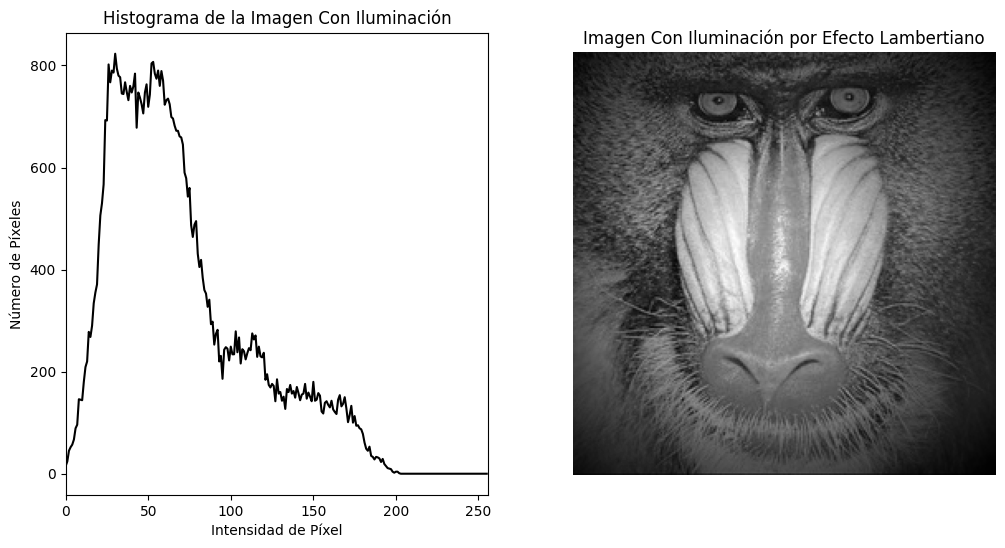

In [309]:
r, c = imagen_gris.shape

# Parámetros para el efecto de iluminación
tau = 5.0
alfa = 245.0
rho = 2.0

# Convertir tau y alfa a radianes
tau = (np.pi * tau) / 180.0
alfa = (np.pi * alfa) / 180.0

# Aplicar el efecto de iluminación
I_effect = np.zeros((r, c))
for i in range(r):
    for j in range(c):
        x0 = (i - r / 2) / (r / 4.0)
        y0 = (j - c / 2) / (c / 4.0)
        R = np.cos(tau) * np.sqrt((rho * np.tan(tau) * np.cos(alfa) - x0) ** 2 + (rho * np.tan(tau) * np.sin(alfa) - y0) ** 2)
        R = np.arctan(rho / R)
        R = np.cos(1.5708 - R)
        I_effect[i, j] = R

# Normalizar el efecto y aplicarlo a la imagen en escala de grises
I_effect_normalized = (I_effect - np.min(I_effect)) / (np.max(I_effect) - np.min(I_effect))
imagen_sombreada = imagen_gris.astype(np.float32) * I_effect_normalized

# Asegurar que la imagen resultante tenga valores válidos de 0 a 255
imagen_sombreada = np.clip(imagen_sombreada, 0, 255).astype(np.uint8)
# Calcular el histograma de la imagen en escala de grises con factor de iluminación
histograma_sombreado = cv2.calcHist([imagen_sombreada], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_sombreado, color='black')
plt.title("Histograma de la Imagen Con Iluminación")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.imshow(imagen_sombreada, cmap="gray")
plt.title("Imagen Con Iluminación por Efecto Lambertiano")
plt.axis('off')

plt.show()

Tiempo total acumulado: 0.1662883758544922 segundos


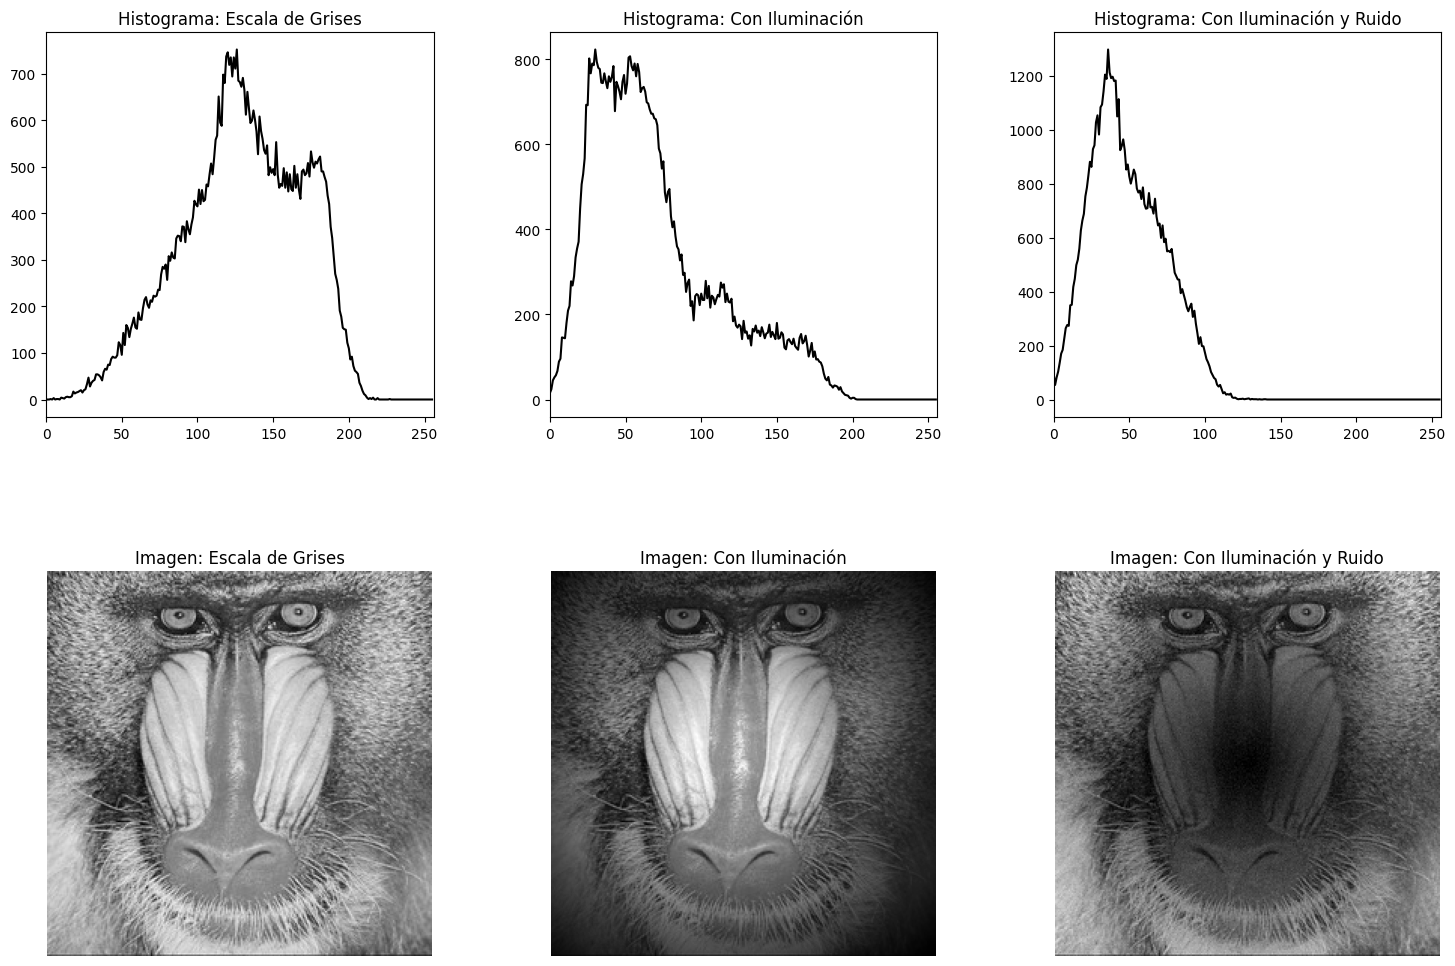

In [310]:
# Configura la figura para tener 2 filas y 3 columnas, ajustando el tamaño total
start_time = time.time()

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Ajustar el espacio entre gráficos
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Primer par: Histograma e imagen en escala de grises
axs[0, 0].plot(histograma, color='black')
axs[0, 0].set_title("Histograma: Escala de Grises")
axs[0, 0].set_xlim([0, 256])

axs[1, 0].imshow(imagen_gris, cmap="gray")
axs[1, 0].set_title("Imagen: Escala de Grises")
axs[1, 0].axis('off')

# Segundo par: Histograma e imagen con iluminación
axs[0, 1].plot(histograma_sombreado, color='black')
axs[0, 1].set_title("Histograma: Con Iluminación")
axs[0, 1].set_xlim([0, 256])

axs[1, 1].imshow(imagen_sombreada, cmap="gray")
axs[1, 1].set_title("Imagen: Con Iluminación")
axs[1, 1].axis('off')

# Tercer par: Histograma e imagen con iluminación y ruido
axs[0, 2].plot(histograma_sombreado_ruido, color='black')
axs[0, 2].set_title("Histograma: Con Iluminación y Ruido")
axs[0, 2].set_xlim([0, 256])

axs[1, 2].imshow(imagen_con_ruido, cmap="gray")
axs[1, 2].set_title("Imagen: Con Iluminación y Ruido")
axs[1, 2].axis('off')

end_time = time.time()
tiempo_acumulado += end_time - start_time

print("Tiempo total acumulado:", tiempo_acumulado, "segundos")

plt.show()


Coeficientes del ajuste:
a0: 53.27633983295624
a1: -0.003896430020909225
a2: -0.018578779126442818
a3: -0.0005864441513390647
a4: 1.7319662684164502e-05
a5: 0.0007317783860997032


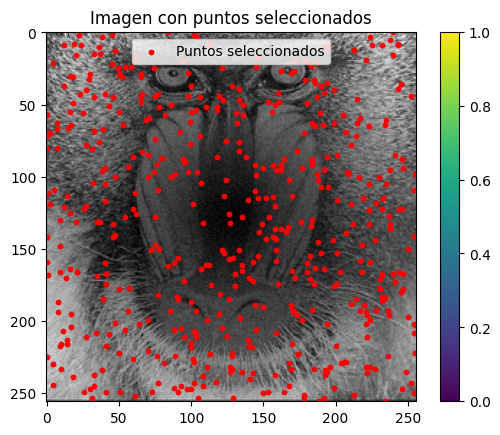

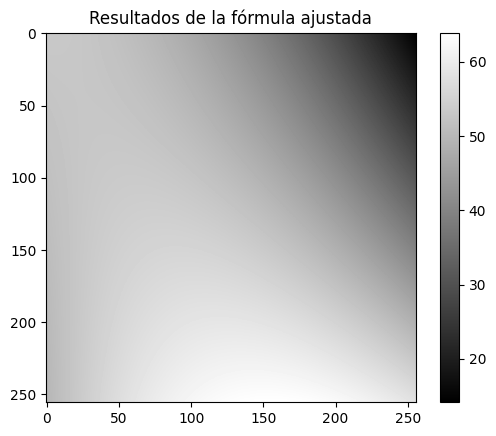

In [331]:
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Número de puntos deseados
num_points = 500

# Generar coordenadas aleatorias dentro del rango de la imagen
x_data = np.random.randint(0, imagen_con_ruido.shape[1], num_points)
y_data = np.random.randint(0, imagen_con_ruido.shape[0], num_points)

# Valores de intensidad de los puntos seleccionados
intensity_values = imagen_con_ruido[y_data, x_data]

# Construir la matriz A
A = np.array([
    [1, x, y, x**2, y**2, x*y]
    for x, y in zip(x_data, y_data)
])

# Calcular A^T
A_transpose = np.transpose(A)

# Calcular A^T * A
A_transpose_A = np.dot(A_transpose, A)

# Calcular A^T * y
A_transpose_y = np.dot(A_transpose, intensity_values)

# Resolver el sistema de ecuaciones lineales
coefficients = np.dot(inv(A_transpose_A), A_transpose_y)

# Coeficientes del ajuste
a0, a1, a2, a3, a4, a5 = coefficients

print("Coeficientes del ajuste:")
print("a0:", a0)
print("a1:", a1)
print("a2:", a2)
print("a3:", a3)
print("a4:", a4)
print("a5:", a5)

# Definir la fórmula ajustada
def formula_ajustada(x, y, a0, a1, a2, a3, a4, a5):
    return a0 + a1 * x + a2 * y + a3 * x**2 + a4 * y**2 + a5 * x * y

# Generar una malla de coordenadas para toda la imagen
x_grid, y_grid = np.meshgrid(np.arange(imagen_con_ruido.shape[1]), np.arange(imagen_con_ruido.shape[0]))

# Evaluar la fórmula ajustada en todas las coordenadas de la imagen
resultados_formula_ajustada = formula_ajustada(x_grid, y_grid, a0, a1, a2, a3, a4, a5)

# Guardar resultados_formula_ajustada como un archivo numpy
np.save('resultados_formula_ajustada.npy', resultados_formula_ajustada)

# Mostrar la imagen original con los puntos seleccionados superpuestos
plt.imshow(imagen_con_ruido, cmap='gray')
plt.scatter(x_data, y_data, color='red', marker='o', s=10, label='Puntos seleccionados')
plt.title('Imagen con puntos seleccionados')
plt.colorbar()
plt.legend()
plt.show()

# Mostrar la imagen de los resultados de la fórmula ajustada
plt.imshow(resultados_formula_ajustada, cmap='gray')
plt.title('Resultados de la fórmula ajustada')
plt.colorbar()
plt.show()

Tiempo total acumulado: 0.29469895362854004 segundos


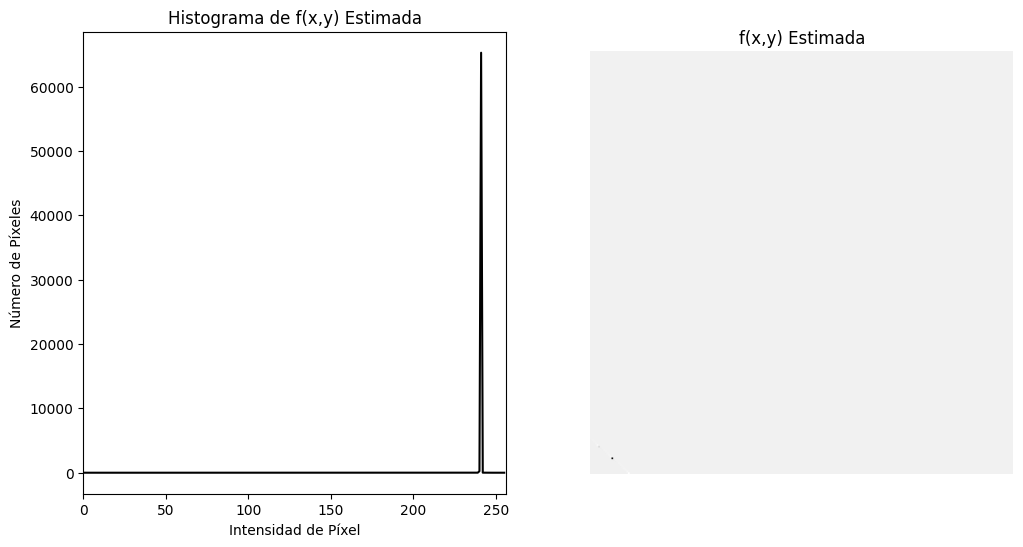

In [322]:
# Una vez que tenemos nuestra h_estimada(x,y) procederemos a obtener nuestra f_estimada(x,y). Para obtener f_estimada(x,y) vamos a realizar una división de nuestra g(x,y)/h_estimada(x,y)
start_time = time.time()


# Convertir resultados_formula_ajustada al mismo tipo de datos que imagen_con_ruido
resultados_formula_ajustada = resultados_formula_ajustada.astype(imagen_con_ruido.dtype)

# Realizar la división de imagen_con_ruido entre resultados_formula_ajustada
f_estimada = cv2.divide(imagen_con_ruido, resultados_formula_ajustada).astype(np.float32)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(f_estimada)
f_estimada = cv2.convertScaleAbs(f_estimada, alpha=255.0/(max_val - min_val), beta=-min_val * 255.0/(max_val - min_val))

histograma_f_estimada = cv2.calcHist([f_estimada], [0], None, [256], [0, 256])
#cv2.imwrite("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/FPB_Baboon_Gradiente_fEstimada.jpg", f_estimada)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_f_estimada, color='black')
plt.title("Histograma de f(x,y) Estimada")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.imshow(f_estimada, cmap="gray")
plt.title("f(x,y) Estimada")
plt.axis('off')

end_time = time.time()
tiempo_acumulado += end_time - start_time

print("Tiempo total acumulado:", tiempo_acumulado, "segundos")

plt.show()

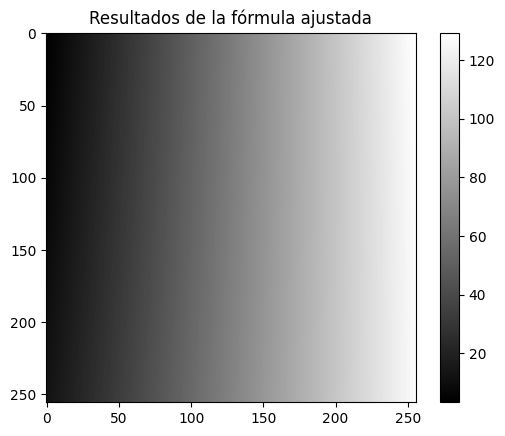

In [142]:
# Cargar el archivo numpy
resultados_cargados = np.load('resultados_formula_ajustada.npy')
# Guardar los resultados en un archivo de texto
np.savetxt('resultados_cargados2.txt', resultados_cargados)

# Mostrar la imagen de los resultados de la fórmula ajustada
plt.imshow(resultados_cargados, cmap='gray')
plt.title('Resultados de la fórmula ajustada')
plt.colorbar()
plt.show()

Tiempo total acumulado: 1.2278010845184326 segundos


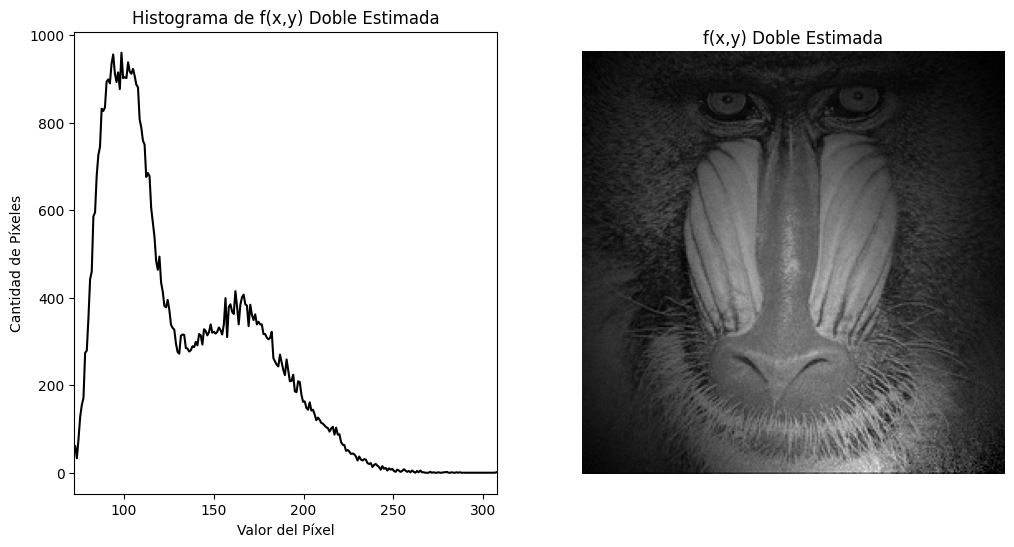

In [183]:
# A continuación realiazremos una normalización de nuestra f_estimada utilizando la media y desviación estandar de nuestra f(x,y)

start_time = time.time()

# Se calcula la media y desviación estandar de g(x,y)
media_observada, desviacionEstandar_observada = cv2.meanStdDev(imagen_gris)

#print(f"Media g(x,y): {media_observada[0][0]}")
#print(f"Desviación estándar g(x,y): {desviacionEstandar_observada[0][0]} \n\n")

# Se calcula la media y desviación estandar de f(x,y) estimada
media_fEstimada, desviacionEstandar_fEstimada = cv2.meanStdDev(f_estimada)

#print(f"Media f(x,y) estimada: {media_pruebaUno[0][0]}")
#print(f"Desviación f(x,y) estimada: {desviacionEstandar_pruebaUno[0][0]}")

f_dobleEstimada = ((f_estimada - media_fEstimada) / desviacionEstandar_fEstimada) * desviacionEstandar_observada + media_observada

#print(f"F doble estimada es {f_dobleEstimada}")

conteos, bordes_bins = np.histogram(f_dobleEstimada.flatten(), bins=256, range=[np.min(f_dobleEstimada), np.max(f_dobleEstimada)])
centros_bins = (bordes_bins[:-1] + bordes_bins[1:]) / 2

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(centros_bins, conteos, color='black')
plt.title("Histograma de f(x,y) Doble Estimada")
plt.xlabel("Valor del Píxel")
plt.ylabel("Cantidad de Píxeles")
# Ajusta los límites del eje x para que coincidan con el rango de datos de la imagen flotante
plt.xlim([np.min(f_dobleEstimada), np.max(f_dobleEstimada)])

# Ahora, muestra la imagen f_dobleEstimada en formato float64
plt.subplot(1, 2, 2)
plt.imshow(f_dobleEstimada, cmap='gray', vmin=np.min(f_dobleEstimada), vmax=np.max(f_dobleEstimada))
plt.title("f(x,y) Doble Estimada")
plt.axis('off')

end_time = time.time()
tiempo_acumulado += end_time - start_time

print("Tiempo total acumulado:", tiempo_acumulado, "segundos")

plt.show()

In [184]:
# Aplicamos el RMSE como criterio de comparación

start_time = time.time()

# Se calcula RMSE entre g(x,y) y f_estimada
if f_estimada.shape != imagen_gris.shape:
    raise ValueError("Las imágenes deben tener el mismo tamaño")

# Calcular la diferencia entre las imágenes
diferencia = f_dobleEstimada.astype(np.float32) - imagen_gris.astype(np.float32)

# Calcular el cuadrado de las diferencias
cuadrado_diferencias = np.square(diferencia)

# Calcular el promedio de los cuadrados de las diferencias
promedio_cuadrados = np.mean(cuadrado_diferencias)

# Tomar la raíz cuadrada del promedio para obtener el RMSE
rmse1 = np.sqrt(promedio_cuadrados)

# Se calcula RMSE entre g(x,y) y f_doble_estimada
if f_dobleEstimada.shape != imagen_gris.shape:
    raise ValueError("Las imágenes deben tener el mismo tamaño")

# Calcular la diferencia entre las imágenes
diferencia = f_dobleEstimada.astype(np.float32) - imagen_gris.astype(np.float32)

# Calcular el cuadrado de las diferencias
cuadrado_diferencias = np.square(diferencia)

# Calcular el promedio de los cuadrados de las diferencias
promedio_cuadrados = np.mean(cuadrado_diferencias)

# Tomar la raíz cuadrada del promedio para obtener el RMSE
rmse2 = np.sqrt(promedio_cuadrados)

end_time = time.time()
tiempo_acumulado += end_time - start_time

print("Tiempo total acumulado:", tiempo_acumulado, "segundos")

print(f"El RMSE entre f_estimada(x,y) y g(x,y) es: {rmse1}")
print(f"El RMSE entre f_dobleEstimada(x,y) y g(x,y) es: {rmse2}")

Tiempo total acumulado: 1.2278010845184326 segundos
El RMSE entre f_estimada(x,y) y g(x,y) es: 36.65312576293945
El RMSE entre f_dobleEstimada(x,y) y g(x,y) es: 36.65312576293945


Tiempo total acumulado: 1.2669446468353271 segundos


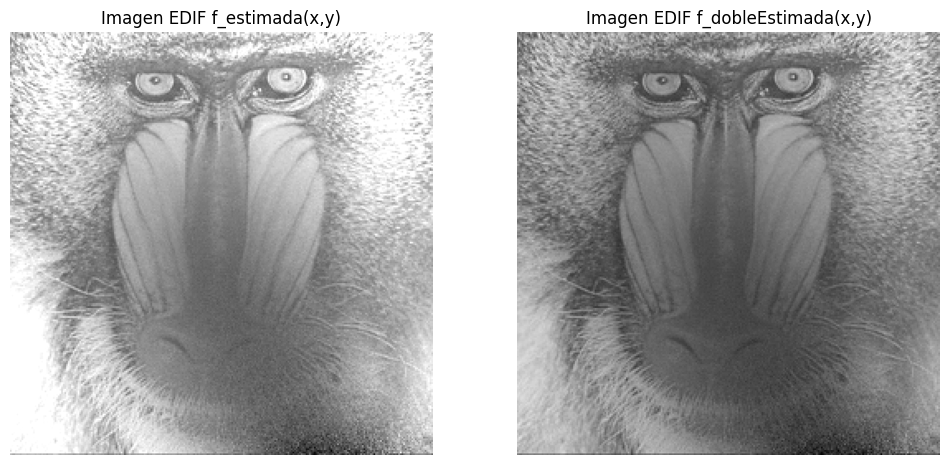

In [185]:
# Aplicamos el EDIF como criterio de comparación

start_time = time.time()

plt.figure(figsize=(12, 6))

# Calcular y mostrar EDIF para f_estimada
diferencia1 = imagen_gris.astype(np.float32) - f_estimada.astype(np.float32)
c1 = 1
c2 = 128
edif1 = c1 * diferencia1 + c2
edif1_visual = np.clip(edif1, 0, 255).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(edif1_visual, cmap='gray')
plt.title('Imagen EDIF f_estimada(x,y)')
plt.axis('off')

# Calcular y mostrar EDIF para f_dobleEstimada
diferencia2 = imagen_gris.astype(np.float32) - f_dobleEstimada.astype(np.float32)
edif2 = c1 * diferencia2 + c2
edif2_visual = np.clip(edif2, 0, 255).astype(np.uint8)

plt.subplot(1, 2, 2)
plt.imshow(edif2_visual, cmap='gray')
plt.title('Imagen EDIF f_dobleEstimada(x,y)')
plt.axis('off')

end_time = time.time()
tiempo_acumulado += end_time - start_time

print("Tiempo total acumulado:", tiempo_acumulado, "segundos")

plt.show()

In [24]:
# Aplicamos el SNR como criterio de comparación
start_time = time.time()

imagen_gris_float = imagen_gris.astype(np.float32)
f_estimada_float = f_estimada.astype(np.float32)
f_dobleEstimada_float = f_dobleEstimada.astype(np.float32)

numerador = np.sum(imagen_gris_float ** 2)
denominador = np.sum((imagen_gris_float - f_estimada_float) ** 2)
denominador2 = np.sum((imagen_gris_float - f_dobleEstimada_float) ** 2)

snr1 = numerador / denominador
snr2 = numerador / denominador2

end_time = time.time()
tiempo_acumulado += end_time - start_time

print("Tiempo total acumulado:", tiempo_acumulado, "segundos")

print(f"El SNR para f_estimada es: {snr1}")
print(f"El SNR para f_dobleEstimada es: {snr2}")

Tiempo total acumulado: 0.4577655792236328 segundos
El SNR para f_estimada es: 16.9095458984375
El SNR para f_dobleEstimada es: 25.70356559753418


Tiempo total acumulado: 0.5704646110534668 segundos


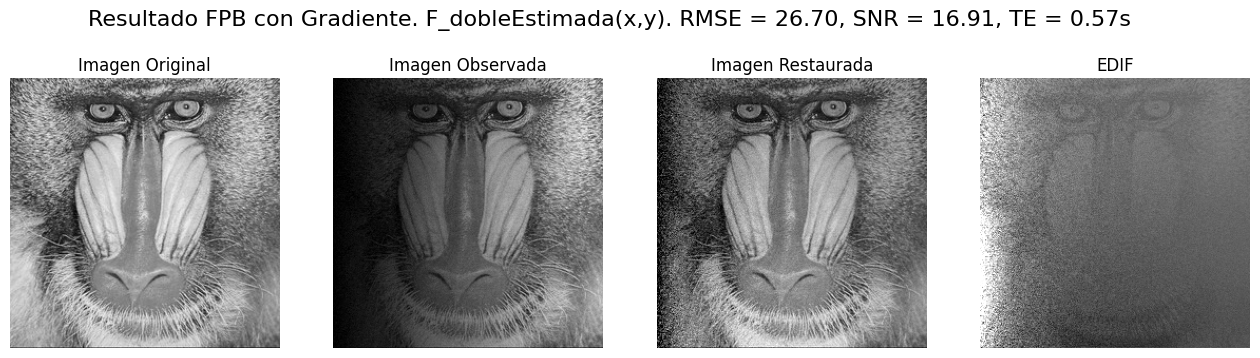

In [25]:
# Comparación de avances

start_time = time.time()

plt.figure(figsize=(16, 8))

plt.subplot(1, 4, 1)
plt.imshow(imagen_gris, cmap="gray")
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(imagen_con_ruido, cmap="gray")
plt.title("Imagen Observada")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(f_estimada, cmap="gray")
plt.title("Imagen Restaurada")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(edif1_visual, cmap="gray")
plt.title("EDIF")
plt.axis('off')

end_time = time.time()
tiempo_acumulado += end_time - start_time

print("Tiempo total acumulado:", tiempo_acumulado, "segundos")

plt.suptitle(f"Resultado FPB con Gradiente. F_dobleEstimada(x,y). RMSE = {rmse1:.2f}, SNR = {snr1:.2f}, TE = {tiempo_acumulado:.2f}s", fontsize=16, y=0.75)
#plt.savefig("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/Resultados_FPB_Gradiente_Baboon.png", dpi=300, bbox_inches='tight')

plt.show()